### 分类树

#####  采用Iris数据集进行决策树分类，由于绘制的图片是一个平面图形，因此只能选择Iris数据集4个特征中的2个，这里选择的是前两个，也就是花萼长度和花萼宽度

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

训练集准确率: 0.9523809523809523
测试集准确率: 0.6222222222222222


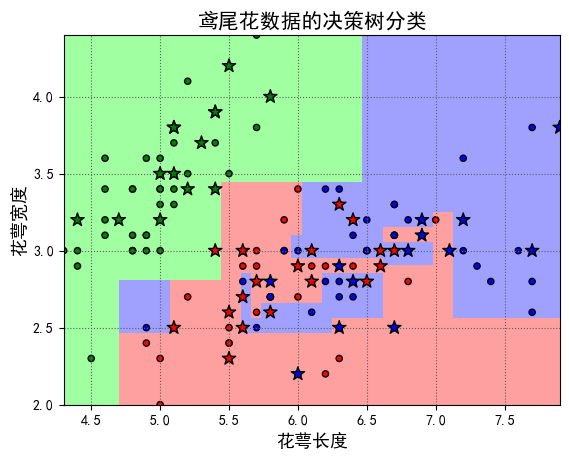

In [3]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
iris = load_iris()
x = pd.DataFrame(iris.data)
y = iris.target

# 为了可视化,仅使用前两列特征
x = x[[0, 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 决策树参数估计
# min_samples_split = 10 : 如果该节点包含的样本数目大于10,则(有可能)对其进行分支
# min_sample_leaf = 10 : 如果将某节点分支后,得到的每个子节点样本数目都大于10,则对其进行分支;否则,不进行分支
# DecisionTrssClassifier 默认使用 criterion = 'gini' ,也就是CART算法,这里使用entropy信息熵
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('训练集准确率:', accuracy_score(y_train, y_train_pred))
y_test_hat = model.predict(x_test)
print('测试集准确率:', accuracy_score(y_test, y_test_hat))
with open('iris.dot', 'w') as f:
    tree.export_graphviz(model, out_file=f, feature_names=iris_feature_E[0:2],
                         class_names=iris_class, filled=True, rounded=True,
                         special_characters=True)
tree.export_graphviz(model, out_file='iris.dot', feature_names=iris_feature_E[0:2],
                    class_names=iris_class, filled=True, rounded=True,
                     special_characters=True)
tree.export_graphviz(model, out_file='iris.dot')

# 输出为PDF格式
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=iris_feature_E[0:2],
                                class_names=iris_class,
                                filled=True, rounded=True,
                                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')
f = open('iris.png', 'wb')
f.write(graph.create_png())
f.close()

# 画图
N, M = 50, 50
# 横纵个采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)

# 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)
# 测试点
y_show_hat = model.predict(x_show).reshape(x1.shape)
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light) # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=100,
            zorder=10, cmap=cm_dark, marker='*') # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=20, cmap=cm_dark) #全部数据
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True, linestyle=':', color='#606060')
plt.title('鸢尾花数据的决策树分类', fontsize=15)
plt.show()

#### 从输出结果来看，训练集和测试集存在一定的偏差，因此过拟合非常严重。

In [7]:
import numpy as np
p1 = 36 / 105
p2 = 32 / 105
p3 = 38 / 105
h = 0
for p in p1, p2, p3:
    h += p * (-np.log2(p))
print("根节点的信息熵:", h)

根节点的信息熵: 1.5825855172364713


#### 处理决策树过拟合问题，最常见的方法就是限制决策树的深度。
##### 一般地，决策树的深度如果很深，虽然分得很细，但是会产生严重的过拟合问题

1  测试集错误率：44.44%
2  测试集错误率：40.00%
3  测试集错误率：20.00%
4  测试集错误率：24.44%
5  测试集错误率：24.44%
6  测试集错误率：26.67%
7  测试集错误率：35.56%
8  测试集错误率：40.00%
9  测试集错误率：35.56%
10  测试集错误率：37.78%
11  测试集错误率：37.78%
12  测试集错误率：35.56%
13  测试集错误率：37.78%
14  测试集错误率：40.00%


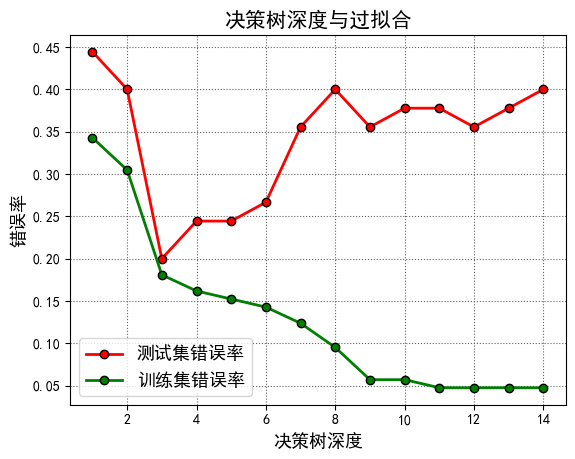

In [11]:
depth = np.arange(1, 15)
err_train_list = []
err_test_list = []
clf = DecisionTreeClassifier(criterion='entropy')

for d in depth:
    clf.set_params(max_depth=d)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    err_train = 1 - accuracy_score(y_train, y_train_pred)
    err_train_list.append(err_train)
    y_test_pred = clf.predict(x_test)
    err_test = 1 - accuracy_score(y_test, y_test_pred)
    err_test_list.append(err_test)
    print(d, ' 测试集错误率：%.2f%%'%(100*err_test))

plt.figure(facecolor='w')
plt.plot(depth, err_test_list, 'ro-', markeredgecolor='k', lw=2, label='测试集错误率')
plt.plot(depth, err_train_list, 'go-', markeredgecolor='k', lw=2, label='训练集错误率')
plt.xlabel('决策树深度', fontsize=13)
plt.ylabel('错误率', fontsize=13)
plt.legend(loc='lower left', fontsize=13)
plt.title('决策树深度与过拟合', fontsize=15)
plt.grid(True, ls=':', color='#606060')
plt.show()

#### 从输出结果来看,随着决策树深度加大,测试集错误率不断增大,当深度为7时,达到了饱和状态,过拟合非常严重,如果限制深度到4,就可以解决过拟合问题,因此限制决策树的深度是比较常见的解决过拟合问题的方法之一
##### 如果需要限制决策树的深度,则只需要在构建决策树的模型时,设置max_depth参数

#### 上述代码是在四个特征中选择两个特征作为特征选择,因此一共有六种选择方法

#### 下面从Iris数据集的四个特征中选择两个特征作为特征选择,输出训练集和测试集的准确率

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

特征: 花萼长度  +  花萼宽度
	训练集准确率: 95.2381%
	测试集准确率: 80.0000%

特征: 花萼长度  +  花瓣长度
	训练集准确率: 95.2381%
	测试集准确率: 97.7778%

特征: 花萼长度  +  花瓣宽度
	训练集准确率: 95.2381%
	测试集准确率: 95.5556%

特征: 花萼宽度  +  花瓣长度
	训练集准确率: 95.2381%
	测试集准确率: 97.7778%

特征: 花萼宽度  +  花瓣宽度
	训练集准确率: 95.2381%
	测试集准确率: 95.5556%

特征: 花瓣长度  +  花瓣宽度
	训练集准确率: 95.2381%
	测试集准确率: 95.5556%



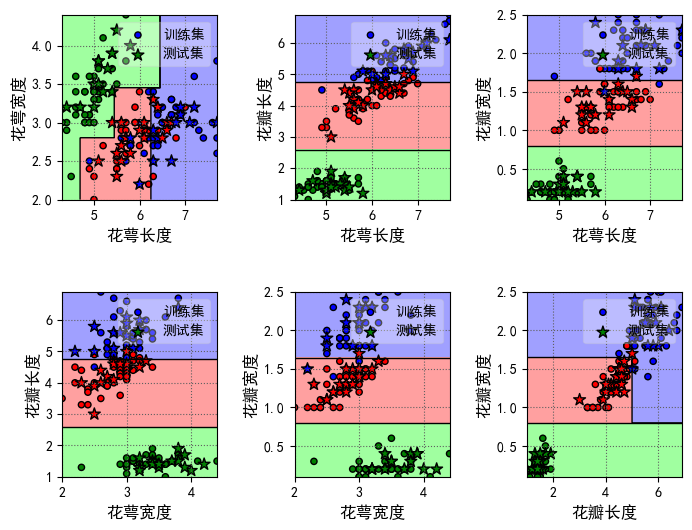

In [18]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris = load_iris()
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
X = pd.DataFrame(iris.data)
y = iris.target
plt.figure(figsize=(8, 6), facecolor='#FFFFFF')

for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = X[pair]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    # 决策树学习,设定max_depth=3
    model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    model.fit(x_train, y_train)
    N, M = 500, 500 # 横纵各采样多少个值
    x1_min, x2_min = x_train.min()
    x1_max, x2_max = x_train.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2) # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1) # 测试点
    # 训练集上的预测结果
    y_trian_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    print('特征:', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t训练集准确率: %.4f%%'%(100*acc_train))
    print('\t测试集准确率: %.4f%%\n'%(100*acc_test))
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2, 3, i+1)
    plt.contour(x1, x2, y_hat, colors='k', levels=[0, 1], antialiased=True, linewidths=1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light) # 预测值
    plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k', cmap=cm_dark, label=u'训练集')
    plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=80, marker='*', edgecolors='k', cmap=cm_dark, label=u'测试集')
    plt.xlabel(iris_feature[pair[0]], fontsize=12)
    plt.ylabel(iris_feature[pair[1]], fontsize=12)
    plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(True, ls=':', color='#606060')

# 调整水平和垂直间距
plt.subplots_adjust(wspace=0.5, hspace=0.5)  
plt.show()